In [162]:
%matplotlib inline

import ipywidgets as wid
from IPython.display import display
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

from helper import tools

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0 255   0]
 [  0   0   0 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]


True

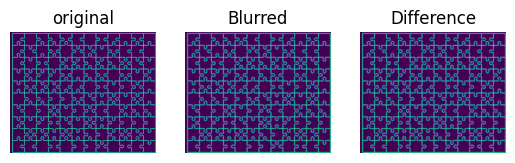

In [177]:
# STEP 1: Let's display the image

color_options = {
    'BGR2RGB': cv2.COLOR_BGR2RGB,
    'BGR2GRAY': cv2.COLOR_BGR2GRAY,
    'BGR2HSV': cv2.COLOR_BGR2HSV}

img = cv2.imread('puzzle.png') # Choose your puzzle file
# _img = plt.imshow(img)
#
# col_dd = colour_picker_dd(color_options.keys(), 'BGR2RGB', 'Colour Mode')
# display(col_dd)
#
# def colour_mode_handler(sender):
#     _img.set_data(cv2.cvtColor(img, color_options[col_dd.value]))
#     _img.show()


img = cv2.inRange(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 50, 220)
blurred = cv2.GaussianBlur(img, (3, 3), 0)
diff = abs(blurred - img)
#img = cv2.threshold(img, 100, 200, cv2.THRESH_BINARY)
plt.subplot(131), plt.imshow(img), plt.title("original"), plt.axis('off')
plt.subplot(132), plt.imshow(blurred), plt.title('Blurred'), plt.axis('off')
plt.subplot(133), plt.imshow(diff), plt.title('Difference'), plt.axis('off')
plt.show

#col_dd.observe(colour_mode_handler)
print(img)
cv2.imwrite('og.png', img)
cv2.imwrite('blur.png', blurred)
cv2.imwrite('diff.png', diff)

In [164]:
'''The next step is to use image segmentation to seperate the various pieces into their individual images
To do this we can use OpenCV's image segmentation tools'''

np.ones([3,1])

low = 0 * np.ones([3, 1], dtype=int)
high = 220 * np.ones([3, 1], dtype=int)

mask = cv2.inRange(img, low, high)
_, mask = cv2.threshold(mask, 0, 220, cv2.THRESH_BINARY)

plt.axis('off')
A = plt.imshow(mask)
plt.title('First Mask')

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:1742: error: (-209:Sizes of input arguments do not match) The lower boundary is neither an array of the same size and same type as src, nor a scalar in function 'cv::inRange'


In [ ]:
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges)
plt.axis('off')

In [ ]:
contours, hierarchy= cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# im2 = np.zeros(mask.shape)
img_contoured = cv2.drawContours(edges, contours, -1, (0, 0, 0))
plt.imshow(edges)
print(np.array(contours, dtype=object).shape)
#print(hierarchy)

In [ ]:
print(contours)

In [ ]:
np.ones([3, 1], dtype=int)
